In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def GeneratePathsGBM(NoOfPaths,NoOfSteps,T,r,sigma,S_0):    
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    X = np.zeros([NoOfPaths, NoOfSteps+1])
    S = np.zeros([NoOfPaths, NoOfSteps+1])
    time = np.zeros([NoOfSteps+1])
        
    X[:,0] = np.log(S_0)
    
    dt = T / float(NoOfSteps)
    for i in range(0,NoOfSteps):

        # Making sure that samples from a normal have mean 0 and variance 1

        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
     
        X[:,i+1] = X[:,i] + (r - 0.5 * sigma * sigma) * dt + sigma *\
        np.power(dt, 0.5)*Z[:,i]
        time[i+1] = time[i] +dt
        
    # Compute exponent of ABM

    S = np.exp(X)
    paths = {"time":time,"S":S}
    return paths
    
def MainCode():
    NoOfPaths = 8
    NoOfSteps = 1000
    S_0       = 1
    r         = 0.05
    mu        = 0.15
    sigma     = 0.1
    T         = 10

    # Money-savings account

    M         = lambda t: np.exp(r * t)
    
    # Monte Carlo paths

    pathsQ    = GeneratePathsGBM(NoOfPaths,NoOfSteps,T,r,sigma,S_0)
    S_Q       = pathsQ["S"]
    pathsP = GeneratePathsGBM(NoOfPaths,NoOfSteps,T,mu,sigma,S_0)
    S_P = pathsP["S"]
    time= pathsQ["time"]    
    
    # Discounted stock paths

    S_Qdisc = np.zeros([NoOfPaths,NoOfSteps+1])
    S_Pdisc = np.zeros([NoOfPaths,NoOfSteps+1])
    i = 0
    for i, ti in enumerate(time):
        S_Qdisc[:, i] = S_Q[:,i]/M(ti) 
        S_Pdisc[:, i] = S_P[:,i]/M(ti) 
    
    # S(T)/M(T) with stock growing with rate r

    plt.figure(1)
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("S(t)")
    eSM_Q = lambda t: S_0 * np.exp(r *t) / M(t)
    plt.plot(time,eSM_Q(time),'r--')
    plt.plot(time, np.transpose(S_Qdisc),'blue')   
    plt.legend(['E^Q[S(t)/M(t)]','paths S(t)/M(t)'])
    
    # S(T)/M(T) with stock growing with rate mu

    plt.figure(2)
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("S(t)")
    eSM_P = lambda t: S_0 * np.exp(mu *t) / M(t)
    plt.plot(time,eSM_P(time),'r--')
    plt.plot(time, np.transpose(S_Pdisc),'blue')   
    plt.legend(['E^P[S(t)/M(t)]','paths S(t)/M(t)'])

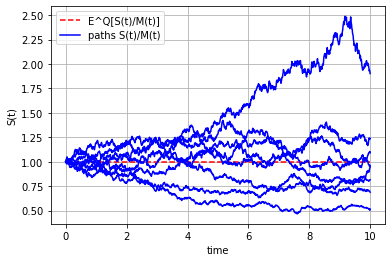

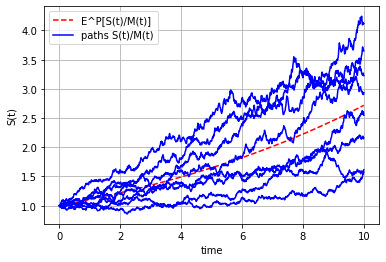

In [3]:
MainCode()
